# Project 3

Import the provided dataset “AirI.csv.” The first column represents the response variable, and the rest of the columns are the predictors (input features). 


For this project, you will apply the three grid search algorithms we studied, such as the Genetic Algorithm, Particle Swarm Optimization, and Simulated Annealing, to determine the best choice of hyperparameters for the Elastic Net and Support Vector Regressor method. Specifically, in the case of the Elastic Net, we look for the best alpha and l1_ratio, and in the case of SVR, we search for the best combination of epsilon and C values. The metric for decision is a 10-fold cross-validated MSE (external validation).

## Importing Libraries

In [ ]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from scipy.optimize import dual_annealing
import seaborn as sns



In [ ]:
!pip install pyswarms #installing pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 5.1 MB/s 


In [ ]:
import pyswarms as ps #importing pyswarms

In [ ]:
!pip install geneticalgorithm #installing genetic algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 1.8 MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15098 sha256=581dd1900e827a34a7f696f98351682d138c96adb0c02678b796ab5ca5e9eaa2
  Stored in directory: /root/.cache/pip/wheels/68/b5/a5/67c4364c354e141f5a1bd3ec568126f77877ab7554cf5af8cb
Successfully built func-timeout


In [ ]:
from geneticalgorithm import geneticalgorithm as ga #importing genetic algorithm

## Importing the data

In [ ]:
#importing the data 
data = pd.read_csv('drive/MyDrive/Data Sets DATA 310/AirI(1).csv', header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,3.4482,0.001314,0.157470,0.688300,0.152920,0.000000,0.00000,0.096603,0.52135,0.382050,...,-2.94590,0.219960,-0.69045,0.240440,-0.258640,1.33870,0.114820,-0.43046,0.82309,1.543500
1,3.3019,0.188490,0.553190,0.258290,0.000031,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.22680,-0.428570,0.74992,-0.111920,1.583000,0.88565,-0.053227,0.67796,-1.72010,-0.550510
2,2.2894,0.052169,0.438520,0.494030,0.015282,0.000000,0.00000,0.000000,0.00000,0.394840,...,1.15790,0.010118,0.73593,1.356000,0.057821,-1.44140,1.581800,1.25420,1.02540,-1.018900
3,2.6207,0.000000,0.000000,0.004213,0.109340,0.493440,0.39300,0.000000,0.00000,0.578540,...,-0.69767,1.577800,0.54899,-0.780420,1.136700,-0.84240,0.993120,-0.44576,-0.78778,-1.490900
4,2.8439,0.000000,0.000000,0.019504,0.260470,0.549860,0.17016,0.010568,0.30520,0.670460,...,-1.49170,-0.688640,-0.69924,0.360740,-0.685860,-0.76161,-0.354560,0.83093,-0.27100,0.388610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2.4101,0.301000,0.021904,0.000415,0.000000,0.000000,0.00000,0.000000,0.00000,0.051206,...,-1.56660,-1.097100,2.77450,0.679850,-0.292200,0.13691,-0.439250,-1.56390,0.29082,0.023485
107,3.1072,0.000734,0.138890,0.688740,0.171630,0.000000,0.00000,0.171260,0.54746,0.280340,...,-0.32440,-1.341500,-1.51650,0.870840,1.023700,0.26581,0.174520,-0.29601,1.13600,0.217580
108,2.4101,0.001095,0.151180,0.688720,0.159000,0.000000,0.00000,0.000000,0.00000,0.194760,...,-0.49572,-0.832130,0.52386,0.189400,1.115700,-0.14259,-0.481300,-1.58790,-0.23976,1.717000
109,2.6207,0.117370,0.526200,0.354590,0.001831,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.87353,0.063740,0.20128,0.090828,0.338310,-1.23960,-1.197600,-0.35008,0.59517,0.803430


In [ ]:
x = data.loc[:,'1':'511'].values # input features
y = data.iloc[:,0].values # response variable

In [ ]:
#x = pd.DataFrame(data=x)

In [ ]:
x # what does x (input features) look like?

array([[ 1.3136e-03,  1.5747e-01,  6.8830e-01, ..., -4.3046e-01,
         8.2309e-01,  1.5435e+00],
       [ 1.8849e-01,  5.5319e-01,  2.5829e-01, ...,  6.7796e-01,
        -1.7201e+00, -5.5051e-01],
       [ 5.2169e-02,  4.3852e-01,  4.9403e-01, ...,  1.2542e+00,
         1.0254e+00, -1.0189e+00],
       ...,
       [ 1.0952e-03,  1.5118e-01,  6.8872e-01, ..., -1.5879e+00,
        -2.3976e-01,  1.7170e+00],
       [ 1.1737e-01,  5.2620e-01,  3.5459e-01, ..., -3.5008e-01,
         5.9517e-01,  8.0343e-01],
       [ 0.0000e+00,  2.0058e-02,  5.3858e-01, ..., -1.1643e+00,
        -4.9661e-01,  5.0338e-01]])

In [ ]:
#x # what does x (input features) look like?

In [ ]:
x.shape # shape of x

(111, 511)

In [ ]:
y # what does our response variable look like? 

array([3.4482, 3.3019, 2.2894, 2.6207, 2.8439, 2.6684, 2.    , 2.5198,
       2.224 , 2.4101, 2.6207, 2.4101, 3.2396, 1.8171, 3.1072, 2.224 ,
       1.    , 2.224 , 1.5874, 3.1748, 2.8439, 3.5569, 4.8629, 3.3322,
       3.0723, 4.1408, 3.3912, 2.8439, 2.7589, 3.3322, 2.7144, 2.2894,
       2.3513, 5.1299, 3.6593, 3.1748, 4.    , 3.42  , 4.2543, 4.5947,
       4.5947, 4.3968, 2.1544, 3.    , 1.9129, 3.6342, 3.2711, 3.9365,
       4.2908, 3.9791, 2.5198, 4.3089, 4.7622, 2.7144, 3.7325, 4.3445,
       3.684 , 4.    , 3.893 , 3.3912, 2.0801, 2.5198, 4.9597, 4.4647,
       4.7914, 3.5303, 3.0366, 4.0207, 2.802 , 3.893 , 2.8439, 3.1414,
       3.5303, 2.7589, 2.0801, 3.5569, 5.5178, 4.1793, 4.2358, 4.9049,
       4.3795, 4.3968, 4.5789, 4.2727, 4.1793, 4.4979, 3.6088, 3.1748,
       2.7144, 2.8439, 2.7589, 2.8845, 3.5303, 2.7589, 3.0366, 2.0801,
       2.3513, 3.583 , 2.6207, 2.3513, 2.8845, 2.5198, 2.3513, 2.8439,
       3.3019, 1.9129, 2.4101, 3.1072, 2.4101, 2.6207, 2.7144])

In [ ]:
y.shape #shape of y 

(111,)

In [ ]:
scale = StandardScaler()

## Creating Functions

In [ ]:
kf = KFold(n_splits=10,shuffle=True,random_state=123)

In [ ]:
# Objective function for particle swarm optimization: elastic net 
def objective_pso_elasticnet(h):
  output = []
  for i in range(h.shape[0]):
    a = h[i,0]
    l = h[i,1]
    model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)# is you want to use Support Vector Recgression, use SVR
    PE = []
    for idxtrain, idxtest in kf.split(x):
      xtrain = x[idxtrain]#going through and collecting MSE?
      ytrain = y[idxtrain]
      xtrain = scale.fit_transform(xtrain)
      xtest = x[idxtest]
      ytest = y[idxtest]
      xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
    output.append(np.mean(PE))
  return output

In [ ]:
# Objective function for particle swarm optimization: support vector regression
def objective_pso_svr(h):
  output = []
  for i in range(h.shape[0]):
    c_new = h[i,0]
    eps = h[i,1]
    model = SVR(kernel='linear', C=c_new, epsilon=eps, max_iter=5000)# is you want to use Support Vector Recgression, use SVR
    PE = []
    for idxtrain, idxtest in kf.split(x):
      xtrain = x[idxtrain]#going through and collecting MSE?
      ytrain = y[idxtrain]
      xtrain = scale.fit_transform(xtrain)
      xtest = x[idxtest]
      ytest = y[idxtest]
      xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
    output.append(np.mean(PE))
  return output

In [ ]:
# objective function: elastic net 
def objective_elasticnet(h):
  a = h[0]
  l = h[1]
  model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)# if you want to use Support Vector Recgression, use SVR
  PE = []
  for idxtrain, idxtest in kf.split(x):
    xtrain = x[idxtrain]#going through and collecting MSE?
    ytrain = y[idxtrain]
    xtrain = scale.fit_transform(xtrain)
    xtest = x[idxtest]
    ytest = y[idxtest]
    xtest = scale.transform(xtest)
    model.fit(xtrain,ytrain)
    PE.append(MSE(ytest,model.predict(xtest)))
  return np.mean(PE)

In [ ]:
# objective function: support vector regression
def objective_svr(h):#use objective function for simulated annealing and genetic algorithm
  c_new_2 = h[0]
  eps_1 = h[1]
  model = SVR(kernel='linear', C=c_new_2, epsilon=eps_1, max_iter=5000)# is you want to use Support Vector Recgression, use SVR
  PE = []
  for idxtrain, idxtest in kf.split(x):
    xtrain = x[idxtrain]#going through and collecting MSE?
    ytrain = y[idxtrain]
    xtrain = scale.fit_transform(xtrain)
    xtest = x[idxtest]
    ytest = y[idxtest]
    xtest = scale.transform(xtest)
    model.fit(xtrain,ytrain)
    PE.append(MSE(ytest,model.predict(xtest)))
  return np.mean(PE)

## Trying to find values 

---
Particle Swarm Optimization: ElasticNet

In [ ]:
#initializer for pso: elastic net 
max = np.array([3,1])
min = np.array([0,0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso_elasticnet, iters=1000)

2022-07-28 03:44:43,565 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.258
2022-07-28 04:05:32,793 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.2580610603170471, best pos: [1.17251074 0.00437475]


Particle Swarm Optimization: Support Vector Regression

In [ ]:
#initializer for pso: svr
max = np.array([3,1])
min = np.array([0,0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso_svr, iters=1000)

2022-08-01 01:21:38,855 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.269
2022-08-01 01:39:30,088 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.2685829116246037, best pos: [1.38020277 0.12656448]


---
Genetic Algorithm: ElasticNet

||||||||||||||||__________________________________ 33.0% GA is running...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e-02, tolerance: 7.699e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.321e-02, tolerance: 8.321e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

||||||||||||||||||________________________________ 35.0% GA is running...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.534e-02, tolerance: 7.699e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e-02, tolerance: 8.321e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

||||||||||||||||||________________________________ 35.5% GA is running...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.534e-02, tolerance: 7.699e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e-02, tolerance: 8.321e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

||||||||||||||||||________________________________ 36.0% GA is running...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.534e-02, tolerance: 7.699e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e-02, tolerance: 8.321e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

||||||||||||||||||________________________________ 36.5% GA is running...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e-02, tolerance: 8.321e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.272e-03, tolerance: 8.106e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

|||||||||||||||||||_______________________________ 37.5% GA is running...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.534e-02, tolerance: 7.699e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e-02, tolerance: 8.321e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

|||||||||||||||||||_______________________________ 38.0% GA is running...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.534e-02, tolerance: 7.699e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e-02, tolerance: 8.321e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

 The best solution found:
 [1.00072459 0.00536996]

 Objective function:
 0.2579545692688243


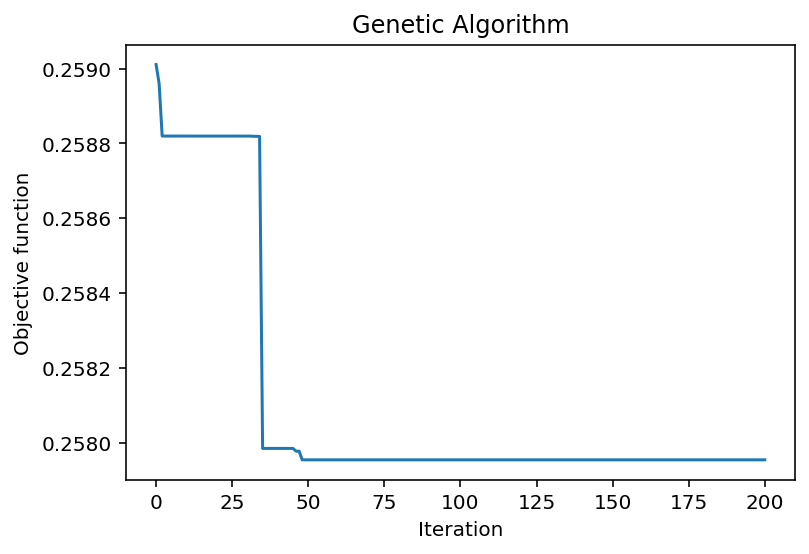

In [ ]:
#genetic algorithm: elastic net 
varbound=np.array([[0,3],[0,1]])

model=ga(function=objective_elasticnet,dimension=2,variable_type='real',variable_boundaries=varbound)

model.run()

Genetic Algorithm: Support Vector Regression

 The best solution found:
 [2.32071524 0.13024   ]

 Objective function:
 0.2685969124615058


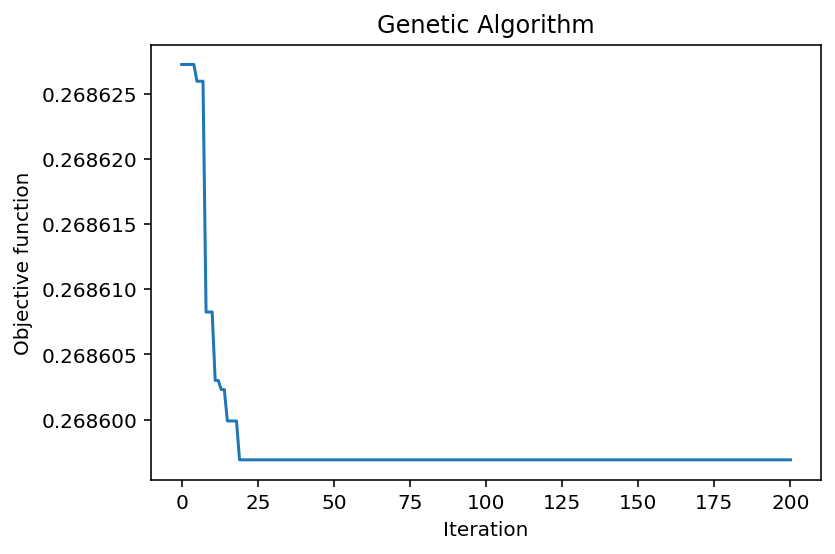

In [ ]:
# genetic algorithm: svr
varbound=np.array([[0,3],[0,1]])

model=ga(function=objective_svr,dimension=2,variable_type='real',variable_boundaries=varbound)

model.run()

---
Simulated Annealing: ElasticNet

In [ ]:
#simulated annealing
lw = [0.0001,0.0001]
up = [3,0.9999]
ret = dual_annealing(objective_elasticnet, bounds=list(zip(lw, up)),maxiter=1000,maxfun=1000)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.894e-03, tolerance: 7.699e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.073e-03, tolerance: 8.321e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
ret.x

array([1.03648999, 0.00486746])

Simulated Annealing: Support Vector Regression

In [ ]:
#simulated annealing
lw = [0.0001,0.0001]
up = [3,0.9999]
ret = dual_annealing(objective_svr, bounds=list(zip(lw, up)),maxiter=1000,maxfun=1000)

In [ ]:
ret.x 

array([0.99977154, 0.13007235])

---
Results: 


ElasticNet:
*   Best alpha: 1
*   Best l1 ratio: .004

Support Vector Regression:
*   Best C value: 1.3
*   Best epsilon: 0.13



